<center>
    <img src="https://u-pariscite.fr/wp-content/uploads/2025/01/universite-paris-cite-5-ans.png" height="300px" alt="Logo Université Paris Cité" /> 
</center>

# Illustration du cours d'électronique - AIPC 2025-2026
Tristan Beau - UFR Physique UPCité - novembre 2025

In [1]:
from scipy import signal
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.axes as ax

from ipywidgets import interact

## Décomposition de la fonction carrée
$s(t)=\sum_{k=0}^{+\infty}\frac{4}{(2k+1)\pi}\sin(2k+1)t$

In [2]:
print("Choisir le nombre d'harmoniques prises en compte dans la série…")
def f(n):
    t=np.linspace(-3*np.pi,3*np.pi,500)
    s=t*0
    for i in np.arange(1,n+1):
        if i%2==1:
            u=4/np.pi*np.sin(i*t)/i
        else:
            u=0*t
        s=s+u
            
        plt.plot(t,u,'b')

    plt.plot(t,s,'r')
    plt.plot(t,np.sign(np.sin(t)),'g')
    plt.grid(True)
    plt.xlabel('t')
    
interact(f,n=(1,50,1))

Choisir le nombre d'harmoniques prises en compte dans la série…


interactive(children=(IntSlider(value=25, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.f(n)>

## Décomposition de la fonction triangulaire
$d(t)=\sum_{k=0}^{+\infty}\frac{-8}{(2k+1)^2\pi^2}\cos(2k+1)t$

In [3]:
print("Choisir le nombre d'harmoniques prises en compte dans la série…")
def f(n):
    t=np.linspace(-3*np.pi,3*np.pi,500)
    s=t*0
    for i in np.arange(1,n+1):
        if i%2==1:
            u=-8/np.pi**2*np.cos(i*t)/i**2
        else:
            u=0*t
        s=s+u
            
        plt.plot(t,u,'b')

    plt.plot(t,s,'r')
    plt.plot(t,signal.sawtooth(t,0.5),'g')
    plt.grid(True)
    plt.xlabel('t')
    
interact(f,n=(1,50,1))

Choisir le nombre d'harmoniques prises en compte dans la série…


interactive(children=(IntSlider(value=25, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.f(n)>

## Signal rectangulaire de rapport cyclique $a$

In [4]:
print("Choisir le rapport cyclique a…")

def go(a):
    t=np.linspace(-3*np.pi,3*np.pi,500)
    e=(signal.square(t,a)+1)/2
    plt.figure(1)
    plt.plot(t,e)
    plt.grid()
    plt.xlabel('t')
    
    t=np.linspace(0,10,500)
    n=np.arange(0,10)
    Cn=2*a*np.abs(np.sinc(a*n)) # nota : np.sinc = sin(pi*x)/(pi*x)
    Cn[0]=a
    Ct=2*a*np.abs(np.sinc(a*t))

    plt.figure(2)
    plt.stem(n,Cn,'r')
    plt.plot(t,Ct,'b--')
    plt.grid()
    plt.xlabel('harmonique')

interact(go,a=(0,1,0.025))

Choisir le rapport cyclique a…


interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, step=0.025), Output()), _dom_classes=('…

<function __main__.go(a)>

## TFD (transformée de Fourier discrète)

In [5]:
# Ne pas hésiter à jouer sur le nombre N d'échantillons…

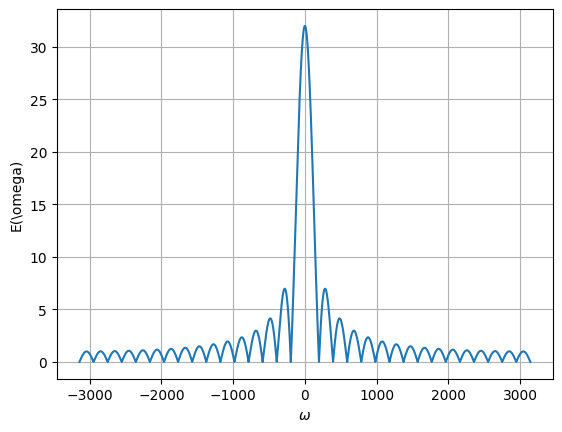

In [6]:
Fe=1e3          # fréquence d'échantillonnage en Hz
Te=1/Fe
we=2*np.pi*Fe   # pulsation d'échantillonnage
N=32            # nombre d'échantillons

def E(W):
    W2=W+1e-16
    return np.exp(-1j*(N-1)/2*Te*W2) * np.sin(N*Te/2*W2) / np.sin(Te/2*W2)

w=np.linspace(-we/2,we/2,10000)
plt.plot(w,np.abs(E(w)))
plt.ylabel(r'E(\omega)')
plt.xlabel(r'$\omega$')
plt.grid()

In [7]:
print("TFD bilatérale d'une sinusoïle de fréquence F0")
def go(F0,phi):
    w0=2*np.pi*F0
    w=np.linspace(-we,we,N*100)

    A=1/2*np.exp(1j*phi)*E(w-w0)+1/2*np.exp(-1j*phi)*E(w+w0)

    plt.plot(w/2/np.pi,abs(A))
    plt.xlabel('fréquence')
    plt.ylabel('A(f)')
    plt.grid()
    plt.show()

interact(go,F0=(0,2e3,51),phi=(-np.pi,np.pi))

TFD bilatérale d'une sinusoïle de fréquence F0


interactive(children=(FloatSlider(value=969.0, description='F0', max=2000.0, step=51.0), FloatSlider(value=0.0…

<function __main__.go(F0, phi)>

In [8]:
print("TFD bilatérale à N échantillons en fréquence (comme une FFT) d'une sinusoïle de fréquence F0")
def go(F0,phi):
    w0=2*np.pi*F0
    w=np.linspace(-we,we,N*100)

    A=1/2*np.exp(1j*phi)*E(w-w0)+1/2*np.exp(-1j*phi)*E(w+w0)

    wn=np.linspace(0,we-we/N,N)
    plt.plot(w,abs(A))
    plt.xlabel('omega')

    An=1/2*np.exp(1j*phi)*E(wn-w0)+1/2*np.exp(-1j*phi)*E(wn+w0)
    
    plt.stem(wn,abs(An),'r')
    plt.grid()
    plt.show()

interact(go,F0=(0,2e3,Fe/2/N),phi=(-np.pi,np.pi))

TFD bilatérale à N échantillons en fréquence (comme une FFT) d'une sinusoïle de fréquence F0


interactive(children=(FloatSlider(value=1000.0, description='F0', max=2000.0, step=15.625), FloatSlider(value=…

<function __main__.go(F0, phi)>

## Fenêtrages

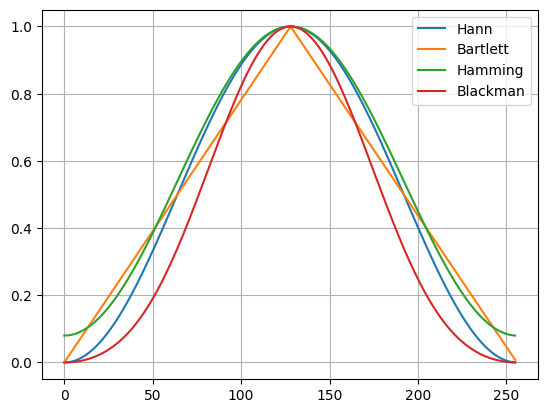

In [9]:
N=256   # Ne pas hésiter à jouer sur ce paramètre de nombre d'échantillons pour voir son effet.
list_n=np.arange(0,N)

Hann=1/2*(1-np.cos(2*np.pi*list_n/N))
Bartlett=2*list_n/N
Bartlett[N//2:]=2*(N-list_n[N//2:])/N
Hamming=0.54-0.46*np.cos(2*np.pi*list_n/N)
Blackman=0.42-0.5*np.cos(2*np.pi*list_n/N)+0.08*np.cos(4*np.pi*list_n/N)

plt.plot(list_n,Hann,label='Hann')
plt.plot(list_n,Bartlett,label='Bartlett')
plt.plot(list_n,Hamming,label='Hamming')
plt.plot(list_n,Blackman,label='Blackman')

plt.legend()

plt.grid()

Sinusoïde échantillonnée


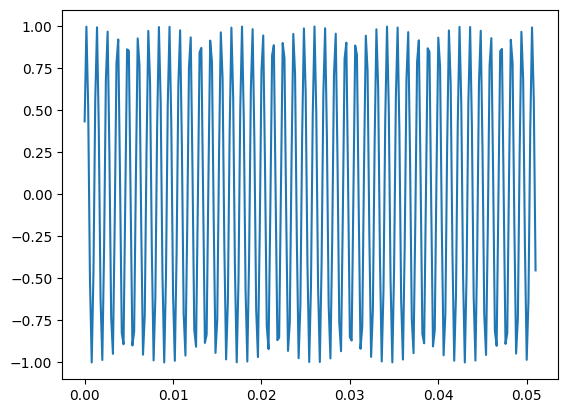

In [10]:
Fe=5e3
Te=1/Fe
list_t=np.arange(0,N*Te,Te)
w0=2*np.pi*853
f=np.sin(w0*list_t +0.45)
print('Sinusoïde échantillonnée')
plt.plot(list_t,f)

<StemContainer object of 3 artists>

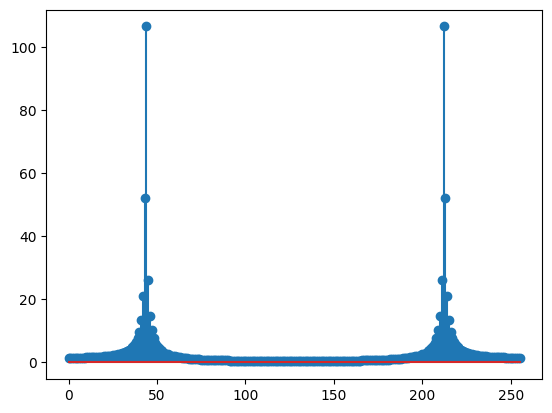

In [11]:
plt.stem(abs(np.fft.fft(f)))

<StemContainer object of 3 artists>

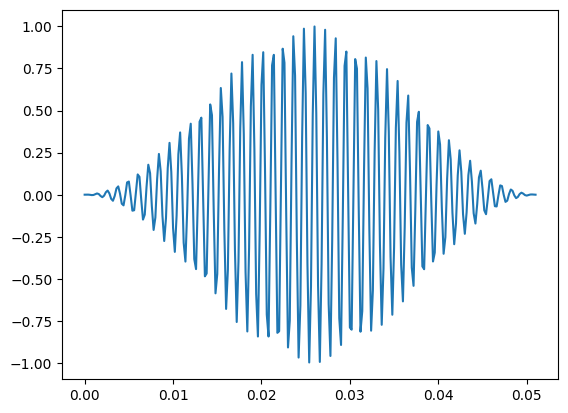

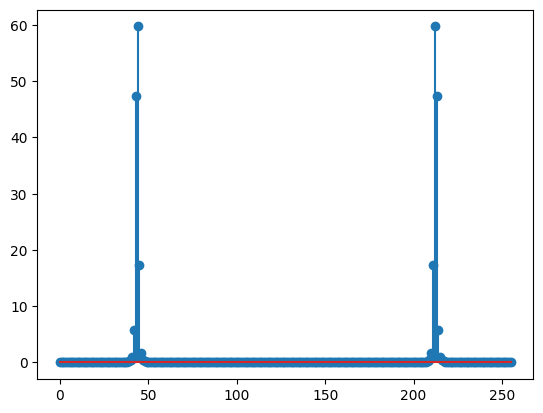

In [12]:
g=f*Hann
#g=f*Hamming
#g=f*Bartlett
#g=f*Blackman

plt.figure(1)
plt.plot(list_t,g)
plt.figure(2)
plt.stem(np.abs(np.fft.fft(g)))

Text(0.5, 1.0, 'FFT de g')

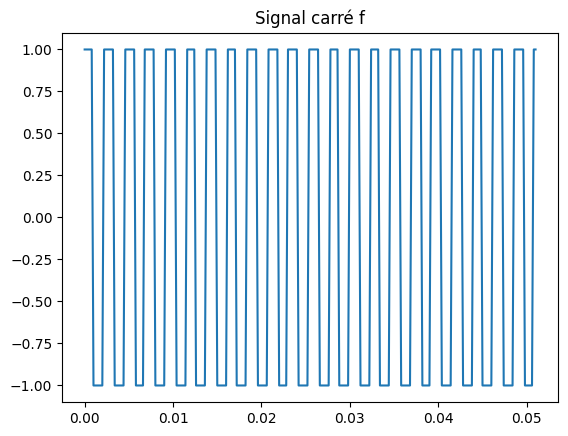

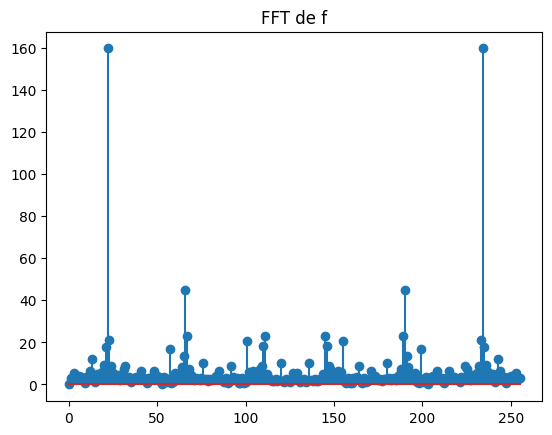

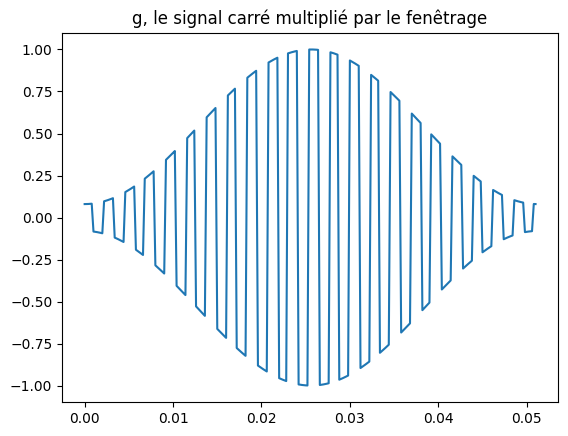

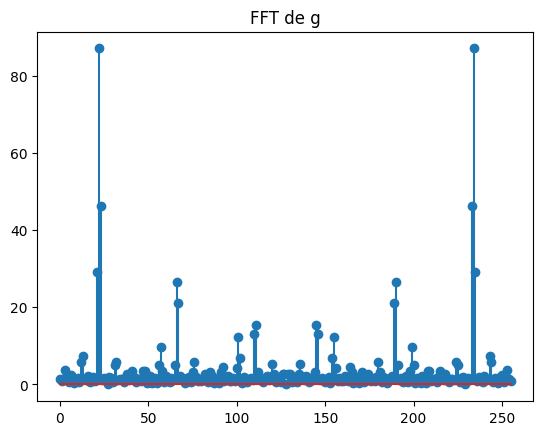

In [13]:
Fe=5e3
Te=1/Fe
list_t=np.arange(0,N*Te,Te)
w0=2*np.pi*432
f=np.sign(np.sin(w0*list_t+0.45))
plt.figure(1)
plt.plot(list_t,f)
plt.title('Signal carré f')
plt.figure(2)
plt.stem(np.abs(np.fft.fft(f)))
plt.title('FFT de f')
g=f*Hamming
plt.figure(3)
plt.plot(list_t,g)
plt.title('g, le signal carré multiplié par le fenêtrage')
plt.figure(4)
plt.stem(np.abs(np.fft.fft(g)))
plt.title('FFT de g')